In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important;} *{font-family:'Consolas'; font-size:14;} </style>"))

# 분류분석 모형

## 확률적 모형

### 확률적 생성모형

#### QDA (이차 판별 분석, Quadratic Discriminant Analysis)
조건부확률 기반 생성 모형

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2,
                           random_state=9)

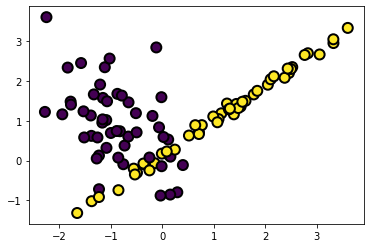

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor='k', linewidth=2)
plt.show()

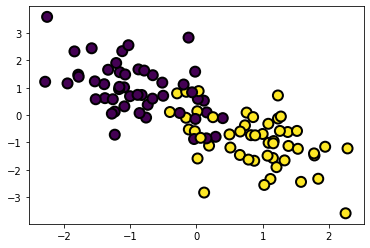

In [6]:
# 예제를 설명하기 위해 대칭구조가 되도록 데이터를 수정
X[y==1, :] = -(X[y==0, :])
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor='k', linewidth=2)
plt.show()

In [7]:
# QDA 모형 만들기
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

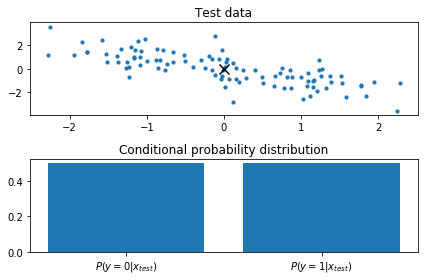

In [9]:
x = [[0, 0]]
p = model.predict_proba(x)[0] # 주어진 위치의 데이터가 각 클래스에 속할 확률
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")

plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

그림에서 X표시가 되어 잇는 산점도 그래프는 테스트 데이터 <br>
막대그래프는 이 테스트 데이터가 각 클래스에 속할 조건부 확률을 나타냄. <br><br>
만약 테스트 데이터가 두 데이터 클래스의 정중앙에 있다면, 이 테스트 데이터가 어느 클래스에 속할지 알 수 없으므로 확률은 0.5로 같은 값을 가짐


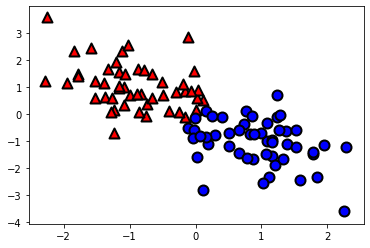

In [10]:
# QDA 모형을 이용해 분류 예측한 데이터의 클래스를 산점도로 나타냄
h = model.predict(X)
plt.scatter(X[h==0, 0], X[h==0, 1], marker='^', c="r",
            s=100, edgecolor="k", linewidth=2)
plt.scatter(X[h==1, 0], X[h==1, 1], marker='o', c="b",
            s=100, edgecolor="k", linewidth=2)
plt.show()

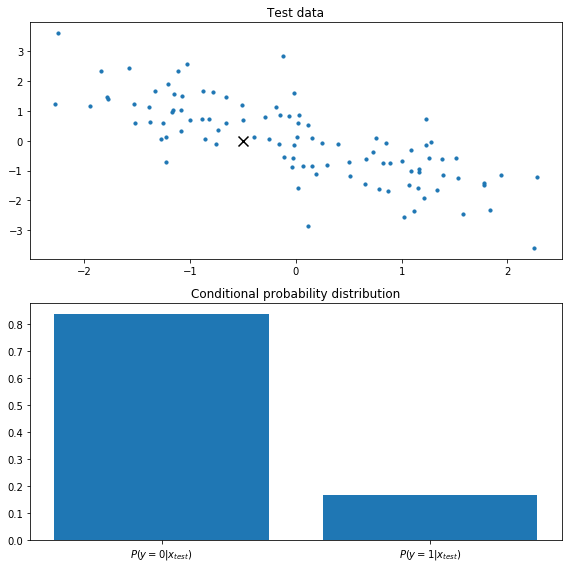

In [11]:
# 만약, 테스트데이터가 y=0인 클래스에 더 가까우면 P(y=0|x_test)가 0.5보다 더 커짐
x = [[-0.5, 0]]
p = model.predict_proba(x)[0] # 주어진 위치의 데이터가 각 클래스에 속할 확률
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")

plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

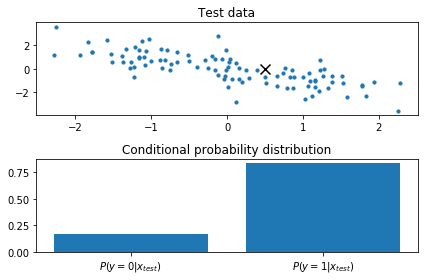

In [12]:
# 테스트데이터가 y=1인 클래스에 더 가까우면 P(y=1|x_test)가 0.5보다 커짐
x = [[0.5, 0]]
p = model.predict_proba(x)[0] # 주어진 위치의 데이터가 각 클래스에 속할 확률
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")

plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

# 분류분석 모형 성능평가

- Scikit-Learn에서 지원하는 성능 평가 함수
- 이진 분류모델에서 사용
    - precision_recall_curve()
    - roc_curve()
    - balanced_accuracy_score()
- 멀티 클래스에서 사용
    - cohen_kappa_score()
    - confusion_matrix()
    - hinge_loss()
    - matthews_corrcoef()
    

In [19]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score()

In [20]:
import pandas as pd

In [22]:
result = pd.read_csv("http://javaspecialist.co.kr/pds/382")

In [23]:
result.head()

,CUST_ID,y_true,y_pred
0,37,0,0
1,51,0,0
2,60,0,0
3,65,0,0
4,73,0,0


In [24]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(result.y_true, result.y_pred)) # 정답/예측

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1635
           1       0.78      0.49      0.60       158

    accuracy                           0.94      1793
   macro avg       0.86      0.74      0.78      1793
weighted avg       0.94      0.94      0.94      1793



### iris 데이터를 이차판별분석모형을 이용해서 분류하고
### ROC 커브를 그리세요

In [27]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns

In [28]:
qda_model = QuadraticDiscriminantAnalysis()

iris = sns.load_dataset("iris")
iris_X = iris.iloc[:, :-1]
iris_y = iris.iloc[:, -1]

In [29]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size=0.3)

In [30]:
qda_model.fit(train_X, train_y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [31]:
y_pred = qda_model.predict(test_X)

In [32]:
pd.crosstab(test_y, y_pred)

col_0,setosa,versicolor,virginica
species,,,
setosa,17,0,0
versicolor,0,11,1
virginica,0,1,15


In [33]:
from sklearn.datasets import make_classification

In [34]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, random_state=0)

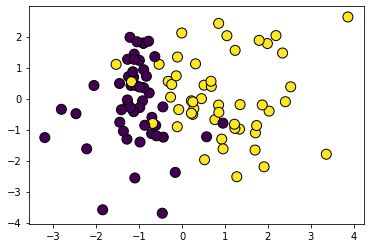

In [35]:
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k')
plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = lg_model.predict(X)
f_value = lg_model.decision_function(X)

In [39]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.c_[f_value, y_pred, y],
                  columns=["f", "y_pred", "y_true"])

In [40]:
df.head()

,f,y_pred,y_true
0,-1.162727,0.0,0.0
1,-1.663346,0.0,0.0
2,-1.926325,0.0,0.0
3,4.390119,1.0,1.0
4,6.405586,1.0,1.0


In [44]:
df.sort_values(by='f', ascending=False, inplace=True)

In [45]:
df.reset_index(drop=True, inplace=True)

In [46]:
df

,f,y_pred,y_true
0,11.454496,1.0,1.0
1,8.170554,1.0,1.0
2,7.143225,1.0,1.0
3,7.111102,1.0,1.0
4,7.018470,1.0,1.0
...,...,...,...
95,-5.587140,0.0,0.0
96,-5.607419,0.0,0.0
97,-5.707310,0.0,0.0
98,-6.484490,0.0,0.0


In [47]:
from sklearn.metrics import roc_curve

### roc_curve
세개의 튜플 값을 반환 <br>
클래스 판별 기준값의 변화에 따른 위양성률(fall-out)과 재현율(recall)의 변화를 시각화 <br>
가로축: False Positive Rate(1 - True Negative Rate(Specificity, TN/(TN+FP))) 값의 비율 <br>
세로축: True Positive Rate(Sensitive(Recall), TP/P) <br>
(precision, specificity 를 사용하는 경우도 있으나, 주로 위처럼 fallout과 recall값을 사용)

In [59]:
from sklearn.metrics import recall_score
recall = recall_score(y, y_pred)

In [60]:
specificity = recall_score(y, y_pred, pos_label=0)
fallout = 1-specificity
"{:.2f}".format(fallout)

'0.04'

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[48,  2],
       [ 5, 45]], dtype=int64)

In [62]:
fpr, tpr, thresholds = roc_curve(y, lg_model.decision_function(X))

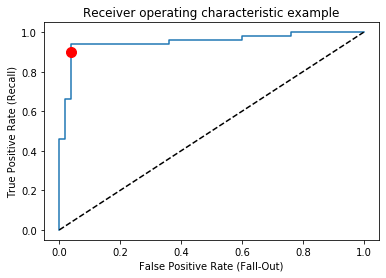

In [63]:
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

# ROC 커브와 AUC

In [64]:
X, y = make_classification(n_samples=1000, 
                           weights=[0.95, 0.05],
                           random_state=5)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [69]:
model1 = LogisticRegression().fit(X, y)
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)

In [70]:
pred1 = model1.predict(X)
pred2 = model2.predict(X)

In [71]:
pd.crosstab(y, pred1)

col_0,0,1
row_0,,
0,940,3
1,30,27


In [72]:
pd.crosstab(y, pred2)

col_0,0,1
row_0,,
0,940,3
1,30,27


두 모델의 precision, recall 등의 수치는 매우 유사함

In [73]:
fpr1, tpr1, thr1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thr2 = roc_curve(y, model2.decision_function(X))

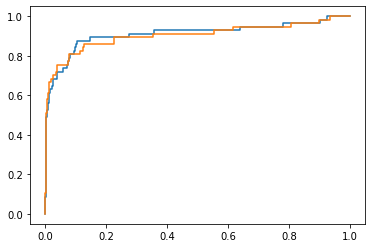

In [74]:
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.show()

ROC 커브를 그리고, 커브 밑의 면적(AUC)를 비교하여 두 모델 중 적합한 모델을 선택 <br>
AUC 값이 더 큰 쪽이 민감하여 선택하게 됨

In [76]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2) # 1이 더 민감함

(0.9112202563673234, 0.9037227214377407)

## sample-iris

In [79]:
from sklearn.datasets import load_iris
iris = load_iris()

In [77]:
from sklearn.preprocessing import label_binarize

In [82]:
iris_X = iris.data
iris_y = label_binarize(iris.target, [0,1,2])

In [83]:
iris_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [84]:
from sklearn.naive_bayes import GaussianNB

In [99]:
gnb_model0 = GaussianNB().fit(iris_X, iris_y[:,0]) # setosa
gnb_model1 = GaussianNB().fit(iris_X, iris_y[:,1]) # setosa

In [100]:
fpr0, tpr0, thr0 = roc_curve(iris_y[:, 0], gnb_model0.predict_proba(iris_X)[:, 1])

In [101]:
fpr1, tpr1, thr1 = roc_curve(iris_y[:, 1], gnb_model1.predict_proba(iris_X)[:, 1])

In [102]:
gnb_model.predict_proba(iris_X)[:,1]

array([9.99999999e-001, 9.99999996e-001, 9.99999999e-001, 9.99999997e-001,
       1.00000000e+000, 9.99999964e-001, 9.99999999e-001, 9.99999999e-001,
       9.99999996e-001, 9.99999996e-001, 9.99999999e-001, 9.99999998e-001,
       9.99999997e-001, 9.99999995e-001, 9.99999998e-001, 9.99999999e-001,
       9.99999997e-001, 9.99999998e-001, 9.99999927e-001, 1.00000000e+000,
       9.99999955e-001, 9.99999995e-001, 9.99999999e-001, 9.99996760e-001,
       9.99999860e-001, 9.99999982e-001, 9.99999963e-001, 9.99999998e-001,
       9.99999998e-001, 9.99999996e-001, 9.99999992e-001, 9.99999917e-001,
       1.00000000e+000, 1.00000000e+000, 9.99999996e-001, 9.99999998e-001,
       9.99999996e-001, 1.00000000e+000, 9.99999998e-001, 9.99999998e-001,
       9.99999999e-001, 9.99999940e-001, 9.99999999e-001, 9.99991307e-001,
       9.99999567e-001, 9.99999992e-001, 1.00000000e+000, 9.99999999e-001,
       9.99999999e-001, 9.99999999e-001, 1.06857205e-109, 6.21929944e-102,
       5.95805983e-124, 4

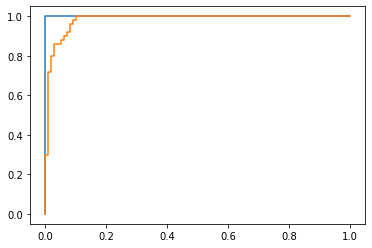

In [103]:
plt.plot(fpr0, tpr0)
plt.plot(fpr1, tpr1)
plt.show()

# 분류모형의 성능 비교

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [106]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

In [107]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel='linear', C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [108]:
# 데이터셋 생성
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0), #arc
            make_circles(noise=0.2, factor=0.5, random_state=1), #circle
            linearly_separable #linear
           ]

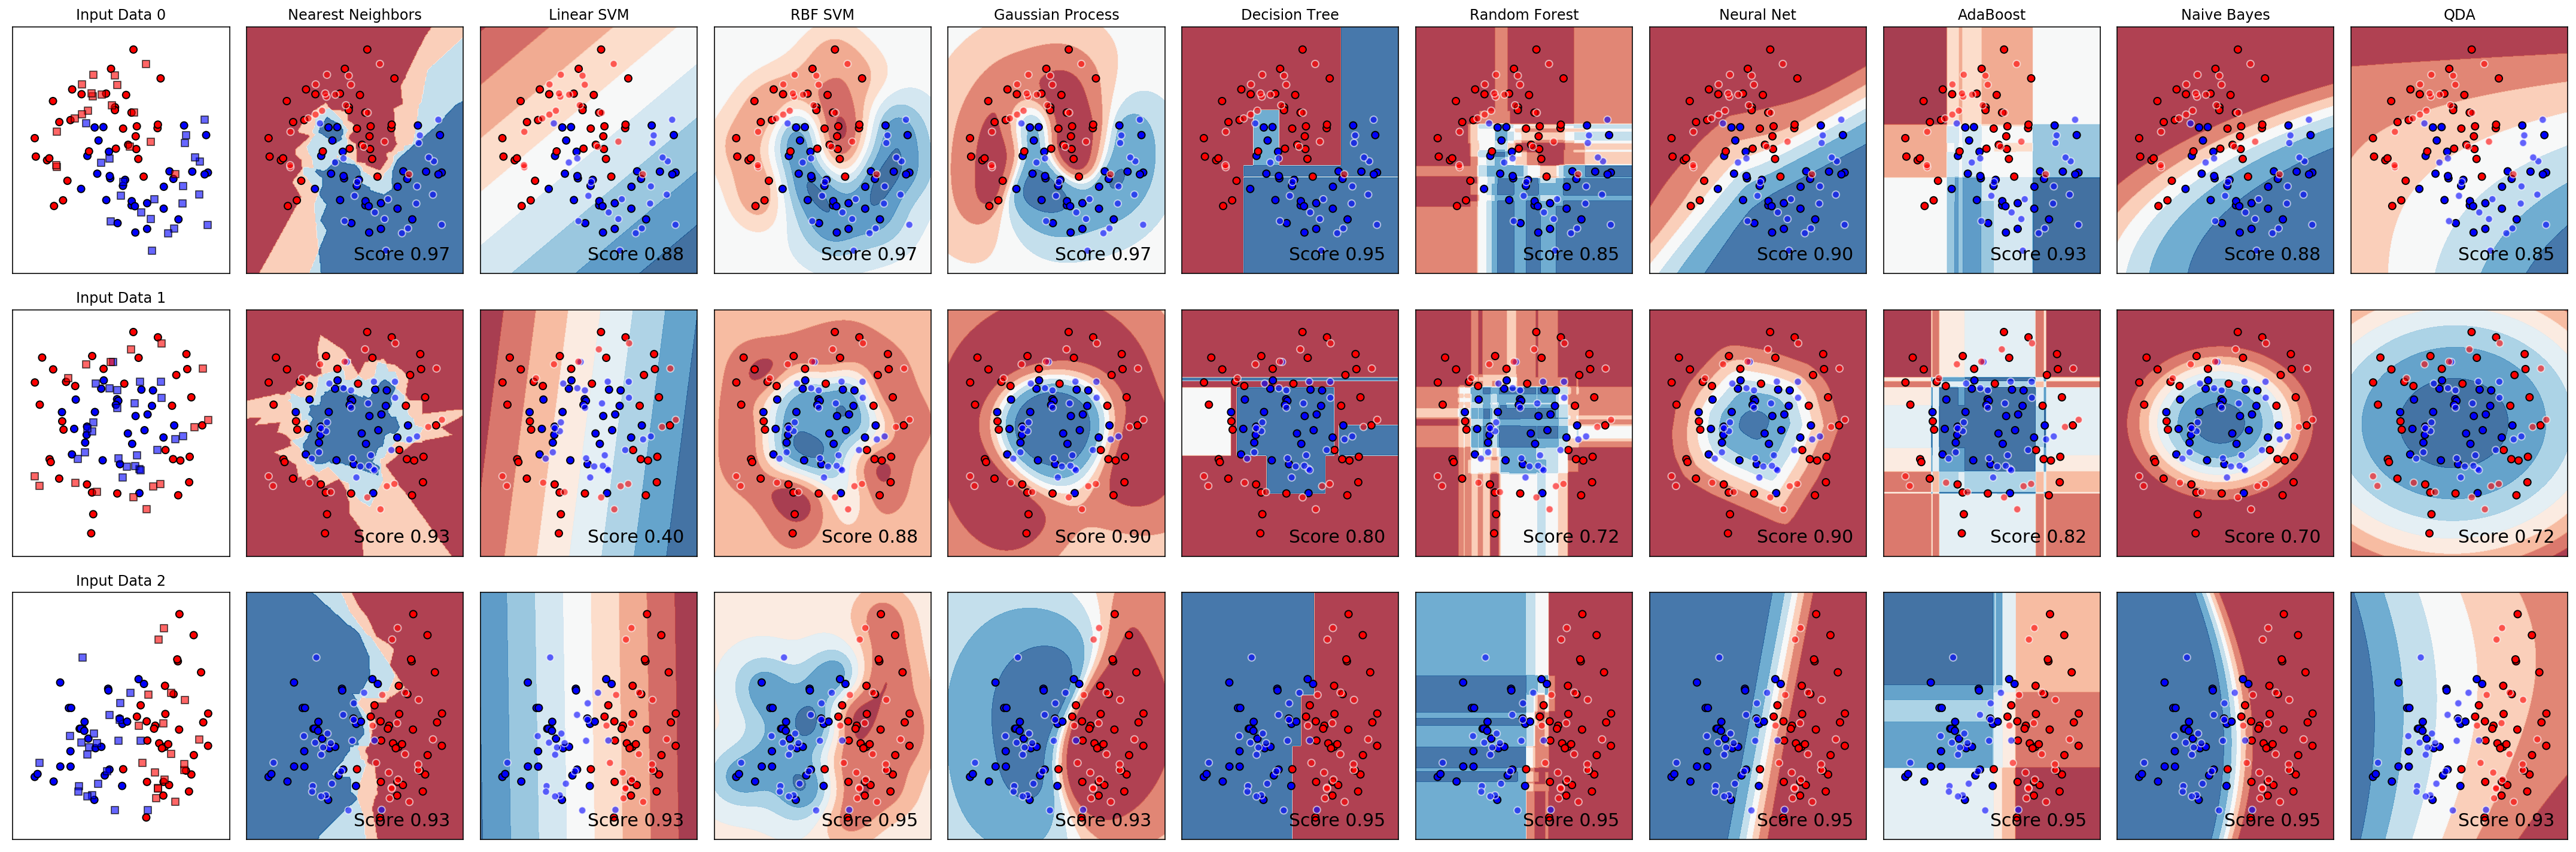

In [110]:
figure = plt.figure(figsize=(30, 10))
h = .02 # 격자 단계
i = 1

# 데이터셋들 마다 반복
for ds_cnt, ds in enumerate(datasets):
    # 데이터셋을 학습 데이터와 검증 데이터로 나눔
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # 데이터셋을 그리기 위한 설정
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers)+1, i)
    ax.set_title('Input Data %d' % ds_cnt)
    
    # 학습 데이터의 산점도
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolor='k')
    # 검증 데이터의 산점도
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
              edgecolor='k', marker='s', alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # 각 분류기마다 반복 처리함
    for name, model in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers)+1, i)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        
        # 결정 경계(decision boundary)를 그리기 위함
        # [x_min, x_max]x[y_min, y_max]
        if hasattr(model, "decision_function"):
            Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # 채워진 등고선(contourf)을 이용해 결졍 경계를 시각화
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # 학습 데이터 분류 예측 결과를 산점도로 시각화
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolor='k')
        # 검증 데이터 분류 예측 결과를 산점도로 시각화
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolor='w', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3,
                ('Score %.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
    
plt.tight_layout()
plt.show()

In [111]:
print(.2)

0.2
